In [1]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting it to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' string representations of lists into actual Python lists
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Define the target country for job data analysis
v_job_country = 'India'

# Define the target job title for focused skill analysis
v_job_title = 'Data Scientist'

# Set the number of top skills to consider for analysis or plotting
v_top_skills = 10

In [3]:
# Filter dataset for the specified country and job title
df_DS_Ind = df[(df['job_country'] == v_job_country) & (df['job_title_short'] == v_job_title)].copy()

# Explode the job_skills list to have one skill per row for detailed analysis
df_DS_Ind_explode = df_DS_Ind.explode('job_skills')

In [4]:
# Group by skills to calculate count and median salary for each skill
df_DS_Ind_group = df_DS_Ind_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Get top skills by highest median salary
df_DS_Ind_top_skill_pay = df_DS_Ind_group.sort_values(by='median', ascending=False).head(v_top_skills)

# Get top skills by count first, then sort those by median salary to highlight valuable popular skills
df_DS_Ind_top_skill_count = (
    df_DS_Ind_group
    .sort_values(by='count', ascending=False)
    .head(v_top_skills)
    .sort_values(by='median', ascending=False)
    .head(v_top_skills)
)

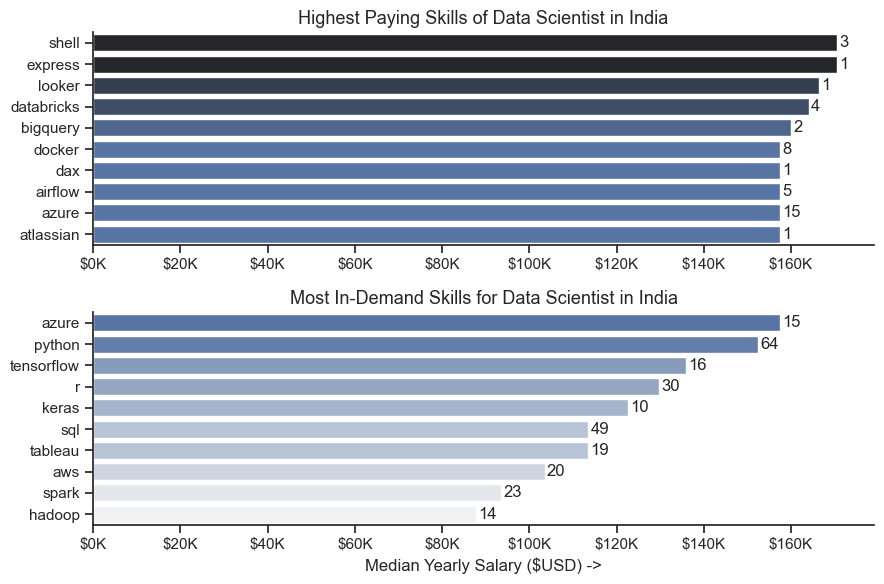

In [5]:
sns.set_theme(style='ticks')

# Create a figure with 2 subplots vertically stacked
fig, ax = plt.subplots(2, 1, figsize=(9, 6))

# Plot 1: Highest Paying Skills
sns.barplot(
    data=df_DS_Ind_top_skill_pay,
    x='median',                     # Median salary on x-axis
    y=df_DS_Ind_top_skill_pay.index,  # Skills on y-axis (index after groupby)
    hue='median',                   # Color bars based on median salary
    palette='dark:b_r',             # Dark blue to red color palette
    ax=ax[0]                       # Plot on the first subplot
)

# Remove top and right spines for a cleaner look on subplot 1
sns.despine(ax=ax[0])

# Remove legend to avoid redundancy
ax[0].legend().remove()

# Annotate each bar with the count of job postings for that skill
for i, count in enumerate(df_DS_Ind_top_skill_pay['count']):
    ax[0].text(df_DS_Ind_top_skill_pay['median'].iloc[i] + 500, i, f"{count}", va='center')

# Format x-axis ticks to display salary in thousands with a '$' sign, e.g., $10K
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# Set titles and labels for the first plot
ax[0].set_title(f"Highest Paying Skills of {v_job_title} in {v_job_country}", fontsize=13)
ax[0].set_xlabel('')  # No x-label here to avoid clutter
ax[0].set_ylabel('')  # No y-label since skill names are self-explanatory

# Plot 2: Most In-Demand Skills (based on count) sorted by median salary for visual consistency
sns.barplot(
    data=df_DS_Ind_top_skill_count,
    x='median',                       # Median salary on x-axis
    y=df_DS_Ind_top_skill_count.index, # Skills on y-axis (index)
    hue='median',                     # Color bars based on median salary (lighter palette)
    palette='light:b',                # Light blue palette
    ax=ax[1]                         # Plot on the second subplot
)

# Remove spines from subplot 2
sns.despine(ax=ax[1])

# Set x-axis limits same as subplot 1 for comparison
ax[1].set_xlim(ax[0].get_xlim())

# Remove legend to keep plot clean
ax[1].legend().remove()

# Annotate bars with the count of job postings for each skill
for i, count in enumerate(df_DS_Ind_top_skill_count['count']):
    ax[1].text(df_DS_Ind_top_skill_count['median'].iloc[i] + 500, i, f"{count}", va='center')

# Format x-axis ticks to display salary in thousands with a '$' sign
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# Set titles and labels for the second plot
ax[1].set_title(f"Most In-Demand Skills for {v_job_title} in {v_job_country}", fontsize=13)
ax[1].set_xlabel('Median Yearly Salary ($USD) ->')  # Label x-axis here
ax[1].set_ylabel('')  # No y-label

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the combined plot
plt.show()